In [19]:
pip install numpy matplotlib pillow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
from collections import Counter
import os

In [21]:
def load_image(image_path, resize_for_display=False):
    """Load an image from file path and return it as a numpy array."""
    img = Image.open(image_path)
    
    # Store original image for display
    display_img = np.array(img)
    
    # Resize image to make processing faster, but not for display
    img_for_processing = img.resize((150, 150))
    
    if resize_for_display:
        return np.array(img_for_processing)
    else:
        return np.array(img_for_processing), display_img

In [22]:
def extract_colors(img_array, num_colors=5):
    """
    Extract dominant colors from an image using K-means clustering.
    
    Args:
        img_array: NumPy array representation of the image
        num_colors: Number of colors to extract
        
    Returns:
        List of colors in RGB format
    """
    # Reshape the image to be a list of pixels
    pixels = img_array.reshape(-1, 3)
    
    # Perform k-means clustering to find the most dominant colors
    kmeans = KMeans(n_clusters=num_colors, random_state=42, n_init=10)
    kmeans.fit(pixels)
    
    # Get the colors as RGB values in the range [0, 255]
    colors = kmeans.cluster_centers_.astype(int)
    
    # Sort colors by frequency (number of pixels assigned to each cluster)
    labels = kmeans.labels_
    counts = Counter(labels)
    colors = [colors[i] for i in sorted(counts.keys(), key=lambda x: -counts[x])]
    
    return colors

In [23]:
def extract_colors(img_array, num_colors=5):
    """
    Extract dominant colors from an image using K-means clustering.
    
    Args:
        img_array: NumPy array representation of the image
        num_colors: Number of colors to extract
        
    Returns:
        List of colors in RGB format
    """
    # Reshape the image to be a list of pixels
    pixels = img_array.reshape(-1, 3)
    
    # Perform k-means clustering to find the most dominant colors
    kmeans = KMeans(n_clusters=num_colors, random_state=42, n_init=10)
    kmeans.fit(pixels)
    
    # Get the colors as RGB values in the range [0, 255]
    colors = kmeans.cluster_centers_.astype(int)
    
    # Sort colors by frequency (number of pixels assigned to each cluster)
    labels = kmeans.labels_
    counts = Counter(labels)
    colors = [colors[i] for i in sorted(counts.keys(), key=lambda x: -counts[x])]
    
    return colors

In [24]:
def plot_colors(colors):
    """
    Display the extracted color palette.
    
    Args:
        colors: List of RGB colors
    """
    # Create a figure and axis
    plt.figure(figsize=(10, 2))
    
    # Plot each color as a rectangle
    for i, color in enumerate(colors):
        plt.subplot(1, len(colors), i+1)
        plt.axis('off')
        # Create a solid color rectangle
        rgb = color / 255.0  # Convert to 0-1 range for matplotlib
        plt.fill([0, 1, 1, 0], [0, 0, 1, 1], color=rgb)
        
        # Add RGB values as text
        hex_color = '#{:02x}{:02x}{:02x}'.format(color[0], color[1], color[2])
        plt.text(0.5, 0.5, hex_color, 
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='white' if sum(color) < 380 else 'black')
    
    plt.tight_layout()
    plt.show()

In [27]:
def extract_and_display_palette(image_path, num_colors=5):
    """
    Extract and display the color palette for an image.
    
    Args:
        image_path: Path to the image file
        num_colors: Number of colors to extract
    """
    # Load the image
    print(f"Processing image: {os.path.basename(image_path)}")
    img_small, img_display = load_image(image_path)
    
    # Display the original image at full resolution
    plt.figure(figsize=(8, 8))
    plt.imshow(img_display)
    plt.axis('off')
    plt.title("Original Image")
    plt.show()
    # Extract colors from the smaller image (for faster processing)
    colors = extract_colors(img_small, num_colors)
    
    # Plot the color palette
    print(f"Extracted {len(colors)} dominant colors:")
    plot_colors(colors)
    
    return colors


Processing image: im1.jpg


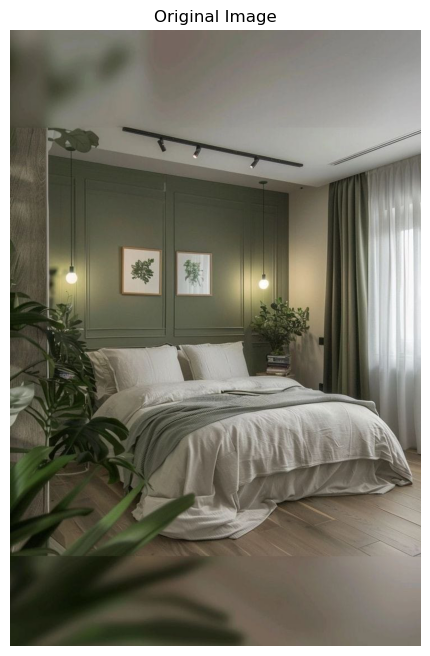

Extracted 6 dominant colors:


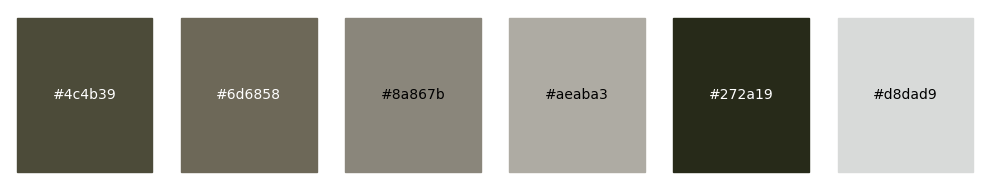

In [28]:
 image_path = r'D:\color extractor\extractor\rooms images\im1.jpg'
palette = extract_and_display_palette(image_path, num_colors=6)